In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from matplotlib.patches import Rectangle

## Read in data

In [2]:
pathway_pvalues = pd.read_csv("Pathway_pvalues_drugsensitivity.csv", index_col = "Pathway")
pathway_pvalues = -pathway_pvalues

newcolumns = []
for item in pathway_pvalues.columns:
    newitem = item.split("Score_")[1]
    newcolumns.append(newitem)
pathway_pvalues.columns = newcolumns

In [3]:
pathway_correlation = pd.read_csv("Pathway_correlation_drugsensitivity.csv", index_col = "Pathway")
pathway_pvalues = -pathway_pvalues

newcolumns = []
for item in pathway_correlation.columns:
    newitem = item.split("Correlation_")[1]
    newcolumns.append(newitem)
pathway_correlation.columns = newcolumns

In [4]:
pathway_binary = pathway_correlation.copy()
pathway_binary = -pathway_binary

In [5]:
pathway_binary[pathway_binary < 0] = -1
pathway_binary[pathway_binary >= 0] = 1

pathway_direction_pvalue = pathway_binary * pathway_pvalues

In [13]:
pathway_direction_pvalue["Cisplatin"].sort_values().head(100)

Pathway
Steroid Biosynthesis                    -0.922105
Methionine Metabolism                   -0.869417
Catecholamine Biosynthesis              -0.741164
Histidine Metabolism                    -0.693886
beta-Alanine Metabolism                 -0.607150
                                           ...   
Malate-Aspartate Shuttle                 2.246497
Inositol Metabolism                      2.313271
Phosphatidylcholine Biosynthesis         2.404558
Phosphatidylethanolamine Biosynthesis    2.404558
Phospholipid Biosynthesis                3.870165
Name: Cisplatin, Length: 97, dtype: float64

In [10]:
pathway_direction_pvalue.to_csv("Pathway_direction_pvalue_shorthouse.csv")

## Look at some of the correlation

In [6]:
pathway_correlation["Rapamycin"].sort_values()

Pathway
Fatty Acid Biosynthesis            -0.338499
Steroidogenesis                    -0.332572
Pterine Biosynthesis               -0.153967
Catecholamine Biosynthesis         -0.151907
Androgen and Estrogen Metabolism   -0.082014
                                      ...   
Glutathione Metabolism              0.464572
Ketone Body Metabolism              0.486996
Glucose-Alanine Cycle               0.492894
Pyruvaldehyde Degradation           0.496704
Vitamin K Metabolism                0.563695
Name: Rapamycin, Length: 97, dtype: float64

In [7]:
pathway_direction_pvalue["Rapamycin"].sort_values()

Pathway
Tyrosine Metabolism                -1.532094
Fatty Acid Biosynthesis            -1.127445
Estrone Metabolism                 -1.123630
Pterine Biosynthesis               -0.886915
Androgen and Estrogen Metabolism   -0.866338
                                      ...   
Glutathione Metabolism              6.512248
Warburg Effect                      6.748918
Propanoate Metabolism               7.085503
Citric Acid Cycle                   7.214662
Glutamate Metabolism                8.306789
Name: Rapamycin, Length: 97, dtype: float64

In [8]:
pathway_correlation["Cisplatin"].sort_values()

Pathway
D-Arginine and D-Ornithine Metabolism       -0.201899
Thyroid Hormone Synthesis                   -0.186463
Pterine Biosynthesis                        -0.099608
Vitamin B6 Metabolism                       -0.067202
Vitamin K Metabolism                        -0.044998
                                               ...   
Phosphatidylinositol Phosphate Metabolism    0.145337
Malate-Aspartate Shuttle                     0.155439
Phospholipid Biosynthesis                    0.172263
Phosphatidylcholine Biosynthesis             0.181825
Phosphatidylethanolamine Biosynthesis        0.184449
Name: Cisplatin, Length: 97, dtype: float64

In [9]:
pathway_pvalues["Cisplatin"].sort_values().head(20)

Pathway
Phospholipid Biosynthesis                       -3.870165
Phosphatidylcholine Biosynthesis                -2.404558
Phosphatidylethanolamine Biosynthesis           -2.404558
Inositol Metabolism                             -2.313271
Malate-Aspartate Shuttle                        -2.246497
Valine, Leucine, and Isoleucine Degradation     -2.204792
Amino Sugar Metabolism                          -2.153696
Propanoate Metabolism                           -2.153696
Ketone Body Metabolism                          -2.145064
Transfer of Acetyl Groups into Mitochondria     -2.142254
Citric Acid Cycle                               -1.979561
Carnitine Synthesis                             -1.971490
Gluconeogenesis                                 -1.954963
Phosphatidylinositol Phosphate Metabolism       -1.924981
Purine Metabolism                               -1.907337
Warburg Effect                                  -1.901891
Beta Oxidation of Very Long Chain Fatty Acids   -1.695628
Inosit

## Make some plots

In [10]:
Rap = pathway_direction_pvalue["Rapamycin"]
Rap = Rap.sort_values()
Rap = pd.DataFrame(Rap)
Rap["index"] = Rap.reset_index().index

In [11]:
Rap.to_csv("Rapamycin_pathways.csv")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


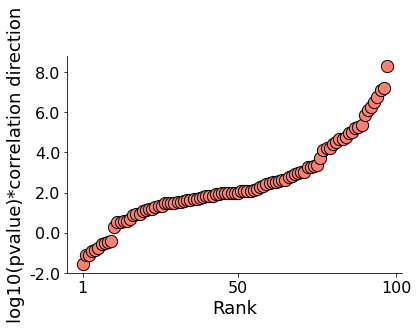

In [12]:
g = sns.scatterplot(Rap["index"]+1, Rap["Rapamycin"], color = sns.color_palette("Set3")[3]
    , legend = False, s = 150, lw = 1, edgecolor = "k")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("log10(pvalue)*correlation direction", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

#g.set_yticks([-3,-2,-1,0,1,2,3])
g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("Rap_correlations.pdf", bbox_inches = "tight")

In [13]:
Rap = pathway_direction_pvalue["Cisplatin"]
Rap = Rap.sort_values()
Rap = pd.DataFrame(Rap)
Rap["index"] = Rap.reset_index().index

In [14]:
Rap.to_csv("Cisplatin_pathways.csv")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


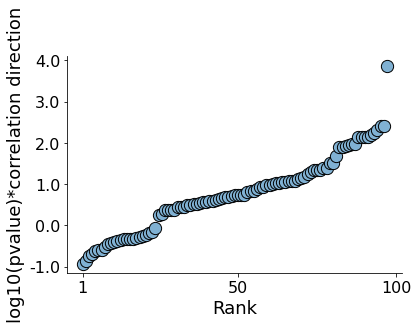

In [15]:
g = sns.scatterplot(Rap["index"]+1, Rap["Cisplatin"], color = sns.color_palette("Set3")[4]
    , legend = False, s = 150, lw = 1, edgecolor = "k")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("log10(pvalue)*correlation direction", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

#g.set_yticks([-2,0,2,4,6,8])
g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("Cisplatin_correlations.pdf", bbox_inches = "tight")

In [16]:
glutamate_metabolism = pathway_correlation.loc["Glutamate Metabolism"]
pvalue = pathway_pvalues.loc["Glutamate Metabolism"]
pvalue = pvalue.rename("Glutamate_pvalue")

In [17]:
volcanoplot_array = pd.concat([glutamate_metabolism, pvalue], axis =1)

In [18]:
volcanoplot_array.sort_values(by = "")

KeyError: ''

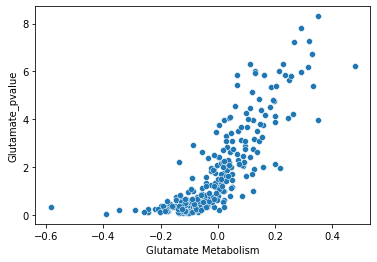

In [19]:
sns.scatterplot(x = volcanoplot_array["Glutamate Metabolism"], y = abs(volcanoplot_array["Glutamate_pvalue"]))

### Heatmap of major metabolic pathways

In [20]:
pathway_subset = pathway_correlation.loc[["Nucleotide Sugars Metabolism", "Purine Metabolism", "Fatty Acid Biosynthesis", "Glycolysis", "Fatty Acid Metabolism", "Citric Acid Cycle", "Glutamate Metabolism", "Mitochondrial Electron Transport Chain", "Warburg Effect"]]

In [21]:
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)

In [22]:
core_correlations = pathway_subset.transpose().corr()

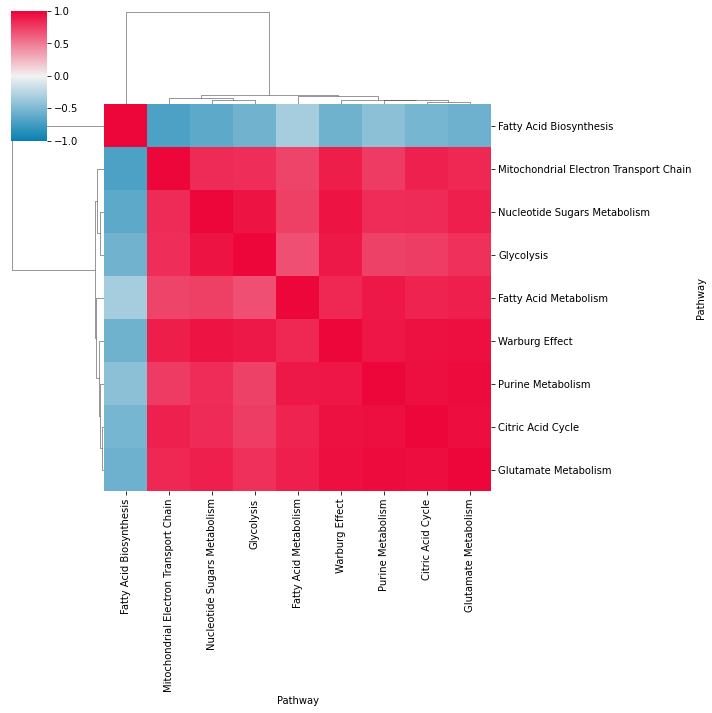

In [23]:
sns.clustermap(core_correlations, cmap = palette_cmap, vmin = -1, vmax = 1)
plt.savefig("Fatty_acid_biosynthesis_opposite.pdf")

In [24]:
from scipy.stats import zscore
zscored = pathway_correlation.transpose().apply(zscore)

In [25]:
plt.rcParams['figure.figsize'] = [12, 12]
from matplotlib.ticker import MaxNLocator

Text(0, 0.5, 'Citric Acid Cycle Relative Resistance')

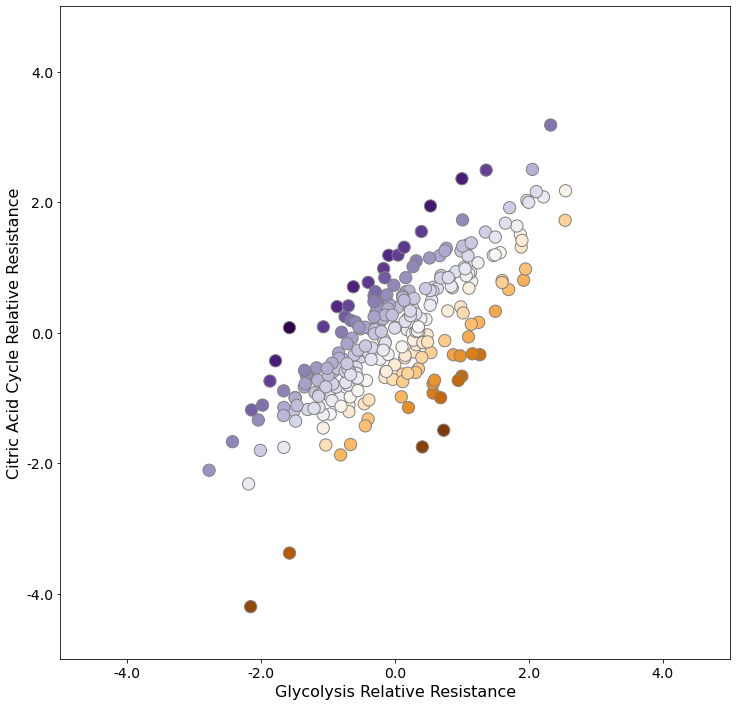

In [26]:
ax = plt.figure().gca()

g = sns.scatterplot(x = zscored["Glycolysis"], y = zscored["Citric Acid Cycle"], s = 150
                    , hue = zscored["Citric Acid Cycle"]-zscored["Glycolysis"], legend = False,
                   palette = "PuOr", edgecolor = "grey")

g.set_xlim(-5,5)
g.set_ylim(-5,5)

g.set_xticklabels(g.get_xticks(), size = 14)
g.set_yticklabels(g.get_yticks(), size = 14)

g.set_xlabel("Glycolysis Relative Resistance", size = 16)
g.set_ylabel("Citric Acid Cycle Relative Resistance", size = 16)

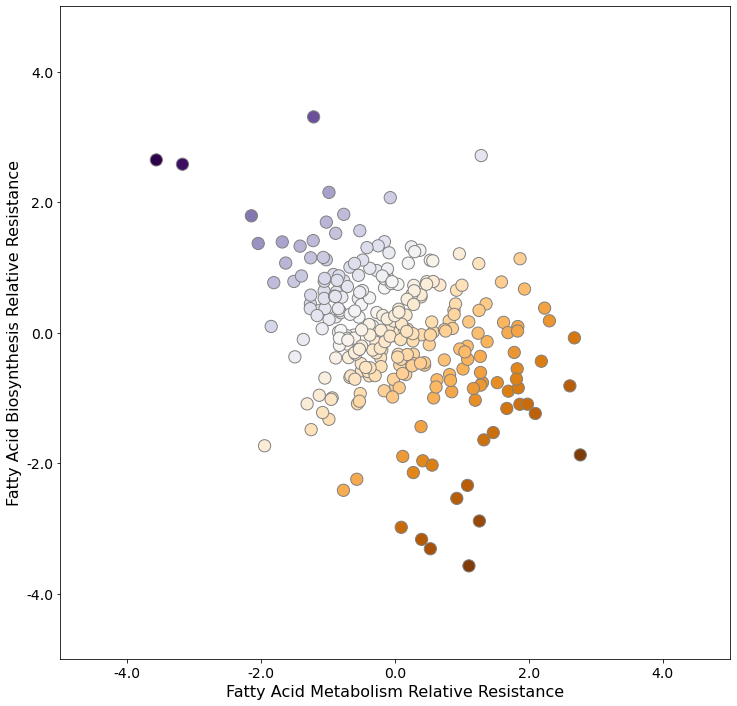

In [27]:
ax = plt.figure().gca()

g = sns.scatterplot(x = zscored["Fatty Acid Metabolism"], y = zscored["Fatty Acid Biosynthesis"], s = 150
                    , hue = zscored["Fatty Acid Biosynthesis"]-zscored["Fatty Acid Metabolism"], legend = False,
                   palette = "PuOr", edgecolor = "grey")

g.set_xlim(-5,5)
g.set_ylim(-5,5)

g.set_xticklabels(g.get_xticks(), size = 14)
g.set_yticklabels(g.get_yticks(), size = 14)

g.set_xlabel("Fatty Acid Metabolism Relative Resistance", size = 16)
g.set_ylabel("Fatty Acid Biosynthesis Relative Resistance", size = 16)

plt.savefig("FAM_vs_FAB_scatterplot.pdf")

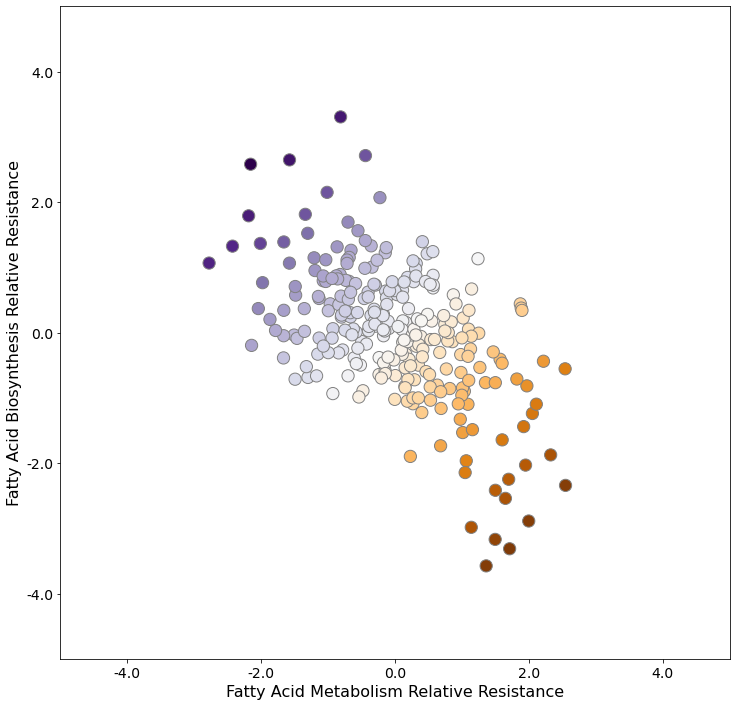

In [28]:
ax = plt.figure().gca()

g = sns.scatterplot(x = zscored["Glycolysis"], y = zscored["Fatty Acid Biosynthesis"], s = 150
                    , hue = zscored["Fatty Acid Biosynthesis"]-zscored["Glycolysis"], legend = False,
                   palette = "PuOr", edgecolor = "grey")

g.set_xlim(-5,5)
g.set_ylim(-5,5)

g.set_xticklabels(g.get_xticks(), size = 14)
g.set_yticklabels(g.get_yticks(), size = 14)

g.set_xlabel("Fatty Acid Metabolism Relative Resistance", size = 16)
g.set_ylabel("Fatty Acid Biosynthesis Relative Resistance", size = 16)

plt.savefig("Glycolysis_vs_FAB_scatterplot.pdf")

In [29]:
pathway_correlation.transpose().corr().to_csv("Pathway_correlations.csv")

In [30]:
zscored.to_csv("Zscore_pathway_drug_associations.csv")

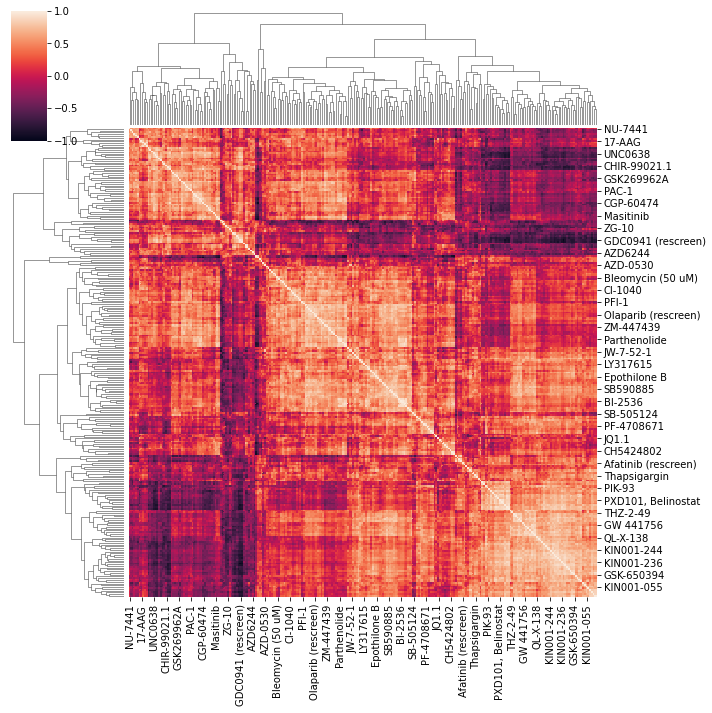

In [31]:
sns.clustermap(pathway_correlation.corr(), vmax = 1, vmin = -1)

In [32]:
synergies_database = pd.read_csv("../../Drug_sensitivity/Drug_synergies_drugcombDB.csv")

In [33]:
synergies_database

,ID,Drug1,Drug2,Cell line,ZIP,Bliss,Loewe,HSA
0,1,5-FU,ABT-888,A2058,1.720,6.260,-2.750,5.540
1,2,5-FU,ABT-888,A2058,5.880,12.330,3.330,11.610
2,3,5-FU,ABT-888,A2058,3.590,11.660,2.650,10.940
3,4,5-FU,ABT-888,A2058,-0.850,5.150,-3.860,4.430
4,5,5-FU,AZD1775,A2058,12.290,15.770,10.400,18.660
...,...,...,...,...,...,...,...,...
498860,498861,Mitomycin C,Valproic acid sodium salt,DIPG25,-3.076,-11.124,-6.078,-6.367
498861,498862,Cyanein,Valproic acid sodium salt,DIPG25,1.320,-1.091,-16.157,1.139
498862,498863,Erlotinib,Valproic acid sodium salt,DIPG25,-15.768,-15.776,-25.465,-6.212
498863,498864,Bafilomycin A1,Valproic acid sodium salt,DIPG25,2.208,10.567,-9.455,1.525


In [34]:
## Generate list of drugs we have values for, and are synergistic (biss > 0)
synergies_indata = synergies_database[synergies_database['Drug1'].str.lower().isin([x.lower() for x in combination_list]) & synergies_database['Drug2'].str.lower().isin([x.lower() for x in combination_list])]
synergies_indata["Drug1"] = synergies_indata["Drug1"].str.lower()
synergies_indata["Drug2"] = synergies_indata["Drug2"].str.lower()
#synergies_indata["Drug1"] = synergies_indata["Drug1"].str.replace("-", "")
#synergies_indata["Drug2"] = synergies_indata["Drug2"].str.replace("-", "")


synergies = synergies_indata.groupby(['Drug1','Drug2']).mean()
synergies_positive = synergies[synergies["ZIP"] > 0]
synergies_positive['Drug1'] = synergies_positive.index.get_level_values(0)
synergies_positive['Drug2'] = synergies_positive.index.get_level_values(1)

NameError: name 'combination_list' is not defined

In [35]:
upper = pathway_correlation.corr().where(np.triu(np.ones(pathway_correlation.corr(method = "pearson").shape), k=1).astype(np.bool))
top_columns = [column for column in upper.columns if any(upper[column] < -0.65)]
top_correlations = pathway_correlation[top_columns].corr(method = "pearson")
combination_list =top_correlations.columns.tolist()
len(top_columns)

75

In [36]:
pathway_correlation.corr(method= "pearson").to_csv("Drug_pearsoncorrelations.csv")

In [52]:
plt.rcParams['figure.figsize'] = [20, 20]
from matplotlib.ticker import MaxNLocator

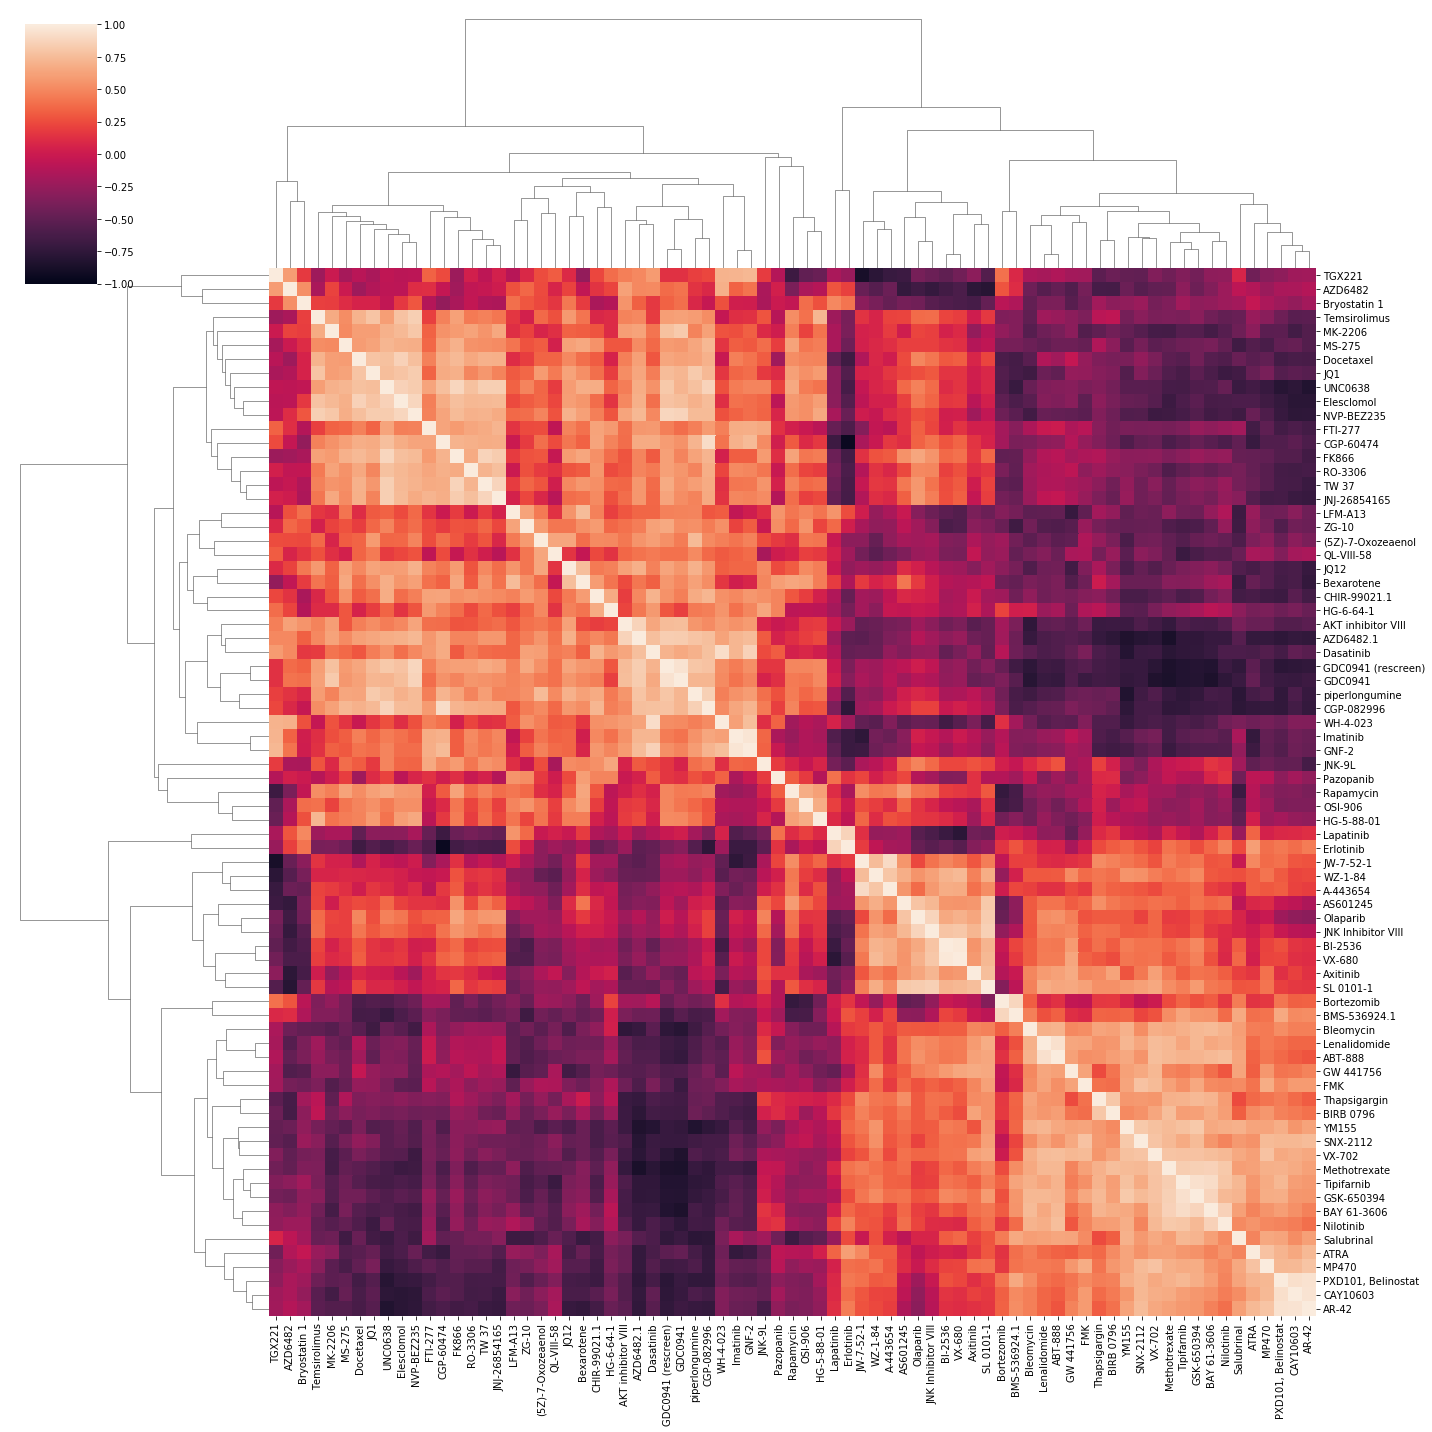

In [53]:
sns.clustermap(top_correlations, vmax = 1, vmin = -1, figsize = (20,20))

In [95]:
## Generate list of drugs we have values for, and are synergistic (biss > 0)
synergies_indata = synergies_database[synergies_database['Drug1'].str.lower().isin([x.lower() for x in combination_list]) & synergies_database['Drug2'].str.lower().isin([x.lower() for x in combination_list])]
synergies_indata["Drug1"] = synergies_indata["Drug1"].str.lower()
synergies_indata["Drug2"] = synergies_indata["Drug2"].str.lower()


synergies = synergies_indata.groupby(['Drug1','Drug2']).mean()
synergies["average_syn"] = synergies[["ZIP", "Bliss", "Loewe", "HSA"]].mean(axis =1)
synergies_positive = synergies[synergies["ZIP"] > 0]
synergies_positive['Drug1'] = synergies_positive.index.get_level_values(0)
synergies_positive['Drug2'] = synergies_positive.index.get_level_values(1)

C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ds728\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [96]:
synergies

ID       ZIP     Bliss      Loewe  \
Drug1        Drug2                                                        
axitinib     bleomycin     320034.500000 -4.019167 -6.867833 -11.286167   
             bortezomib    313576.583333  0.103333  0.409833  -4.768500   
             dasatinib     361163.500000  1.885500  3.881833  -1.335833   
             docetaxel     327175.183333  6.188667  7.509167 -14.472500   
             imatinib      342813.500000  0.682333 -0.844667  -9.843000   
...                                  ...       ...       ...        ...   
thapsigargin docetaxel     485002.666667  1.412667  0.113667  -0.306000   
             erlotinib     475200.500000  1.143000  1.806500  -3.701000   
             jq1           498477.000000 -8.177000 -7.768000 -10.056000   
             lenalidomide  475024.500000 -4.748000 -6.869500 -39.853500   
             thapsigargin  461874.000000 -0.457273 -0.660909  -0.765455   

                                HSA  average_syn  
Drug1        Drug2                                
axitinib     bleomycin    -7.071000    -7.311042  
             bortezomib   -0.418500    -1.168458  
             dasatinib     3.276333     1.926958  
             docetaxel     7.155667     1.595250  
             imatinib     -3.248000    -3.313333  
...                             ...          ...  
thapsigargin docetaxel     2.410000     0.907583  
             erlotinib    -0.522500    -0.318500  
             jq1           0.441000    -6.390000  
             lenalidomide -1.204000   -13.168750  
             thapsigargin  1.891818     0.002045  

[97 rows x 6 columns]

In [97]:
synergies_positive

ID        ZIP      Bliss      Loewe  \
Drug1        Drug2                                                          
axitinib     bortezomib    313576.583333   0.103333   0.409833  -4.768500   
             dasatinib     361163.500000   1.885500   3.881833  -1.335833   
             docetaxel     327175.183333   6.188667   7.509167 -14.472500   
             imatinib      342813.500000   0.682333  -0.844667  -9.843000   
             lapatinib     323959.500000   0.037167   0.365667  -6.654000   
             nilotinib     393465.500000   1.420167   1.603167  -3.087833   
bleomycin    bortezomib    222390.482143   2.284464   2.426250  -2.258750   
bortezomib   abt-888        45179.320513   1.552885   1.114038 -27.700897   
             dasatinib      43823.525641   1.276346   0.084359 -10.478077   
             methotrexate  123884.000000   1.990000   1.990000   3.770000   
dasatinib    abt-888        44013.782051   1.616282   2.044487  -6.261987   
             lapatinib     219189.413793   0.837759   3.063448  -4.114310   
             thapsigargin  477000.500000  14.275000  13.859500  17.146500   
docetaxel    lapatinib     215157.672414  10.518103  13.478966   7.964310   
erlotinib    bortezomib     44223.935897   1.319423   1.073782  -4.162179   
             dasatinib      44227.935897   1.081218   1.999872   4.217885   
             jq1           498482.000000   0.217000   9.280000   5.388000   
imatinib     bortezomib    228070.259259   0.662963   1.280000 -25.759259   
             dasatinib     208019.745763   3.730678   4.949322  -6.841017   
             docetaxel     211911.285714  12.335357  14.010179   7.437857   
             lapatinib     210686.389831   1.783390   0.554746 -11.167458   
             nilotinib     226298.163636   2.267818   0.182182  -4.989818   
             pazopanib     130044.000000   0.580000   0.580000   2.640000   
jq1          docetaxel     485103.000000   5.456500   6.103000 -15.012000   
             jq1           466753.000000   9.765000   9.569333  -0.082333   
             mk-2206       471375.250000   9.678750   8.417750   0.928000   
             thapsigargin  487162.333333  14.124667  13.939667   3.216333   
lapatinib    bortezomib     91541.361905   1.687286   1.386190 -11.928095   
             dasatinib      44553.371795   3.004872   3.196795   3.618718   
             mk-2206        57626.351852   1.570833   3.476528   6.309444   
lenalidomide erlotinib     475197.500000   1.073000   7.368000  -1.213000   
methotrexate abt-888        44685.782051   0.768910  -1.583205 -19.940321   
             imatinib      227862.788462   3.158654   2.342308 -17.178654   
             jq1           488289.000000  14.605500   7.189500  -7.958000   
             thapsigargin  483660.000000   6.681000   6.184000  -3.073000   
mk-2206      dasatinib      44855.012821   5.233526   6.283462   7.908141   
             docetaxel     485112.000000  12.641000  13.450500   1.002500   
             erlotinib      57840.648148   2.849676   3.965139   7.073194   
             jq1           489364.000000   7.514500   8.312500   1.925000   
             lenalidomide  479067.000000   0.326000  -1.551000 -16.809000   
             mk-2206       464544.500000  20.861667  20.407500  -4.920500   
             thapsigargin  476641.200000   7.074400   8.714200  -1.902600   
nilotinib    dasatinib     220551.305085   3.228136   3.302881  -8.504746   
             docetaxel     215865.175439  10.990175  11.134211   1.753860   
             lapatinib     221758.932203   2.707966   0.728644  -8.380169   
pazopanib    docetaxel     125346.000000   4.850000   4.850000   5.870000   
thapsigargin dasatinib     474802.500000  10.029500  10.365500 -55.969500   
             docetaxel     485002.666667   1.412667   0.113667  -0.306000   
             erlotinib     475200.500000   1.143000   1.806500  -3.701000   

                                 HSA  average_syn         Drug1         Drug2  
Drug1        Drug2            

In [98]:
synergies_positive2 = synergies_positive.copy()
swapped_columns =['ID', 'ZIP', 'Bliss', 'Loewe', 'HSA', 'average_syn', 'Drug2', 'Drug1']
synergies_positive2.columns = swapped_columns

In [99]:
synergies_positive = pd.concat([synergies_positive, synergies_positive2])
synergies_positive = synergies_positive[synergies_positive['Drug1'] != synergies_positive['Drug2']]

In [100]:
### Generate mask
master_frame = []
for column in top_correlations.columns:
    columnvalues = []
    for row in top_correlations.index:
        column = column.lower()
        row = row.lower()
        if column in (synergies_positive["Drug1"].tolist()):
            if row in (synergies_positive[synergies_positive["Drug1"] == column]["Drug2"].tolist()):
                #print(column,row)
                columnvalues.append(True)
            else:
                columnvalues.append(False)
        else:
            columnvalues.append(False)
    master_frame.append(columnvalues)
        
mask = pd.DataFrame(master_frame)    
mask.columns = top_correlations.columns
mask.index = top_correlations.index

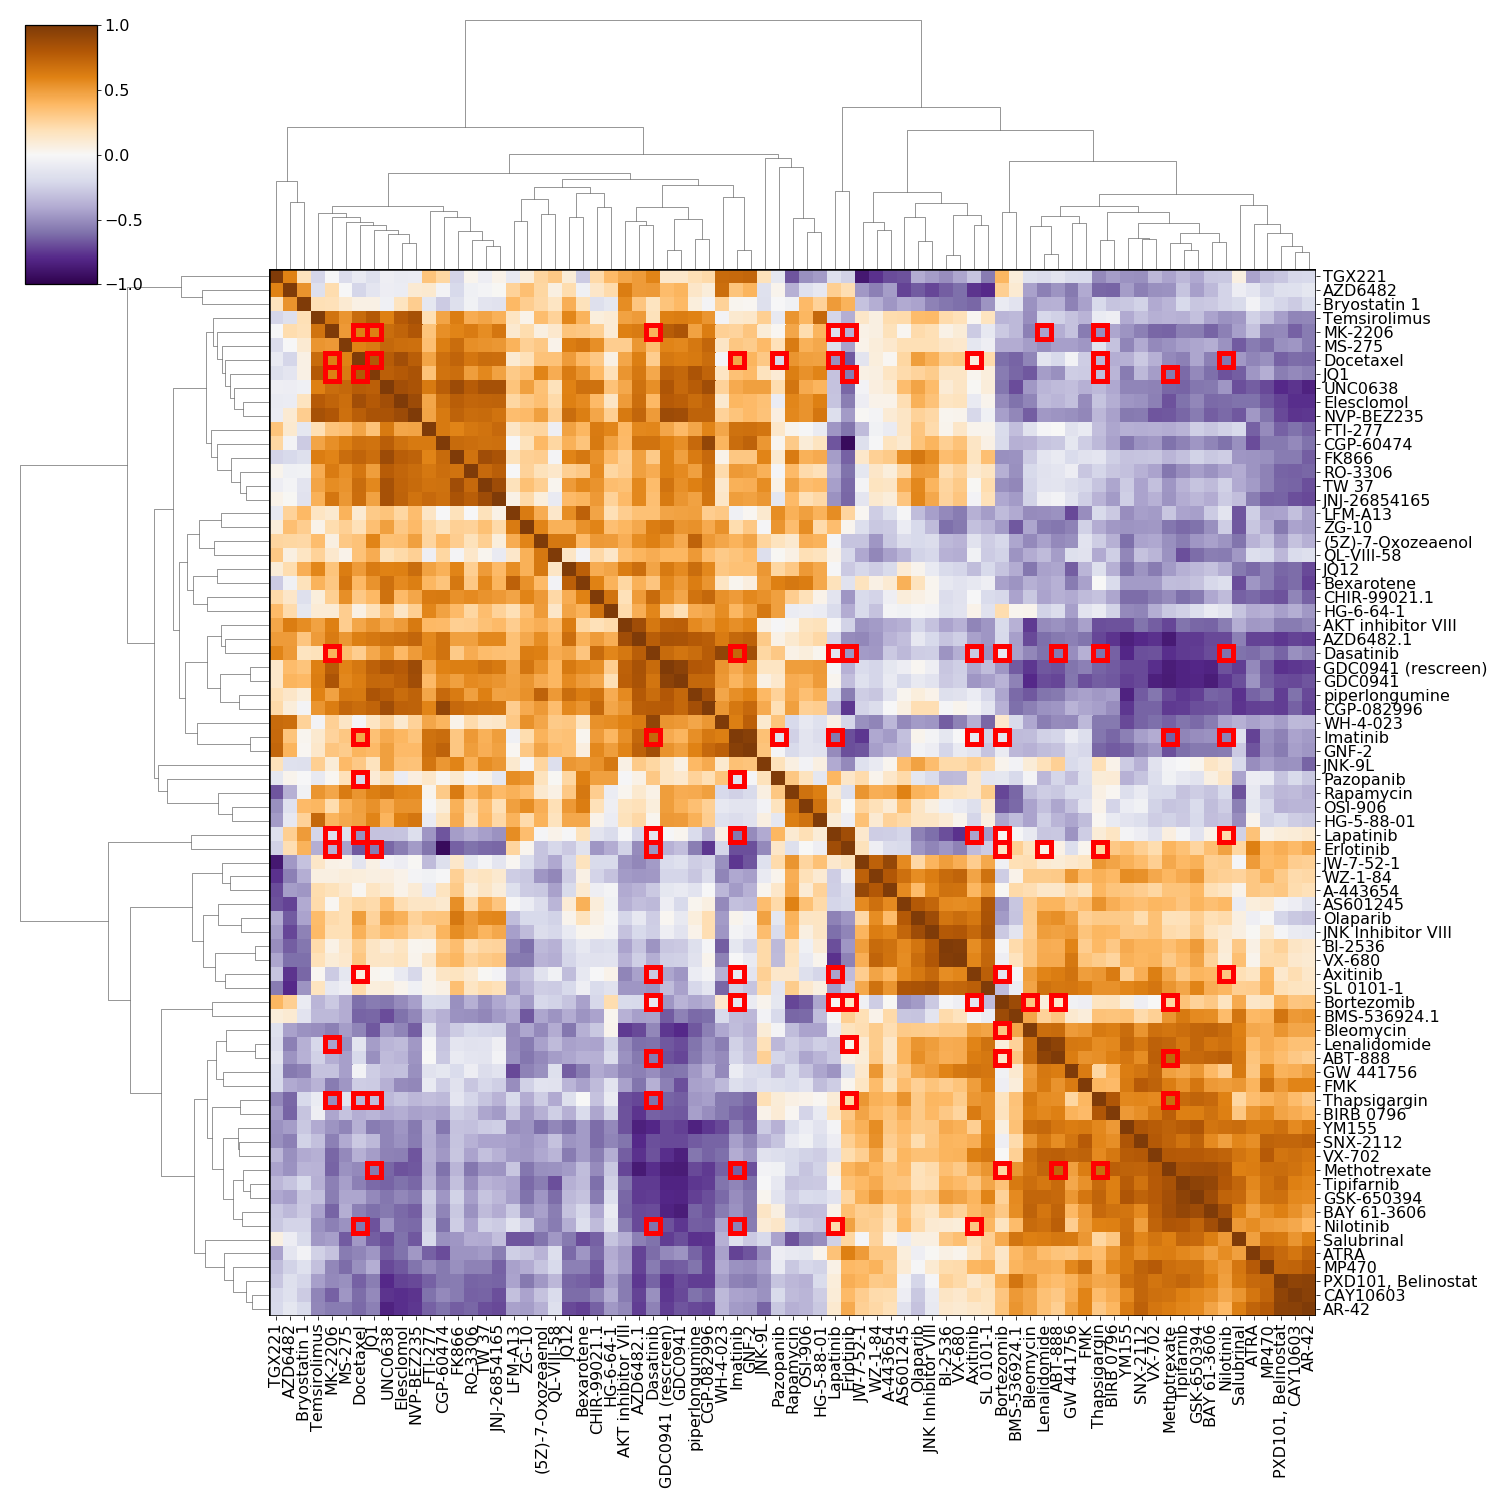

In [103]:
labelled = (np.where(mask, "***", ""))

g = sns.clustermap(top_correlations, vmax = 1, vmin = -1, figsize = (20,20),
              lw = 0, linecolor="white", cmap = "PuOr_r")#, annot = labelled, fmt = "")

ax = g.ax_heatmap
ax.set_xlabel("")
ax.axhline(0, c="k", lw = 2.5)
ax.axvline(top_correlations.shape[0], c="k", lw = 2.5)
ax.axvline(0, c="k", lw = 2.5)
ax.axhline(top_correlations.shape[1], c="k", lw = 2.5)

##### Generate mask from ordered dataframe 
ordered_dataframe = g.data2d
### Generate mask
master_frame = []
for column in ordered_dataframe.columns:
    columnvalues = []
    for row in ordered_dataframe.index:
        column = column.lower()
        row = row.lower()
        if column in (synergies_positive["Drug1"].tolist()):
            if row in (synergies_positive[synergies_positive["Drug1"] == column]["Drug2"].tolist()):
                #print(column,row)
                columnvalues.append(True)
            else:
                columnvalues.append(False)
        else:
            columnvalues.append(False)
    master_frame.append(columnvalues)
        
mask = pd.DataFrame(master_frame)    
mask.columns = ordered_dataframe.columns
mask.index = ordered_dataframe.index


coord = np.where(mask)
coordinates = [(x,y) for x, y in zip(coord[0], coord[1])]

for item in coordinates:
    ax.add_patch(Rectangle(item, 1, 1, fill=False, edgecolor='red', lw=5))

    
ax.set_yticklabels(ax.get_yticklabels(), ha = "left", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), size = 16)

cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.outline.set_visible(True)
cbar.outline.set_linewidth(1.25)
cbar.ax.tick_params(labelsize=16)

plt.savefig("Drug_synergies_ZIP_v1.pdf", bbox_inches ="tight")